# CLIENT: OLIST

"[Olist is] the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com"

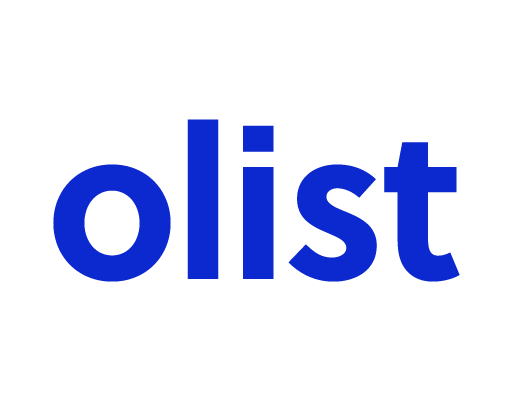

In [1]:
from IPython.display import Image
Image(filename='img/olist_logo.PNG', width=200, height=40) 

# PROJECT SCOPE

Assignment = Model for customer lifetime value (LTV) value for first 6 months of customer

The goals of customer LTV include:
* Distinguish active customers from inactive customers.
* Generate transaction forecasts for individual customers.
* Predict the purchase volume of the entire customer base.

# DATA BACKGROUND + SETUP

### DATA SOURCE
Source: Kaggle
https://www.kaggle.com/olistbr/brazilian-ecommerce

Data Provided: 
* 9 related tables that together provide data on Olist customer journey and operations
* Companies and partners were replaced with Game Of Thrones great houses


### ASSUMPTIONS

* No major changes since last day of data
* 6 months is suitable to address LTV (limitation of data)

### NOTES
* Only the first 6 months of a customer data will be used for analysis unless otherwise noted
* Using payment_value to represent revenue but this includes liabilities (freight, tax, commision to seller, credit card processing fee, etc)
* Orders with status 'canceled were removed from database


### TOOLS

* SQL: Creating dataframes to upload + Data Qualification
* Python - Matplotlib, StatsModel


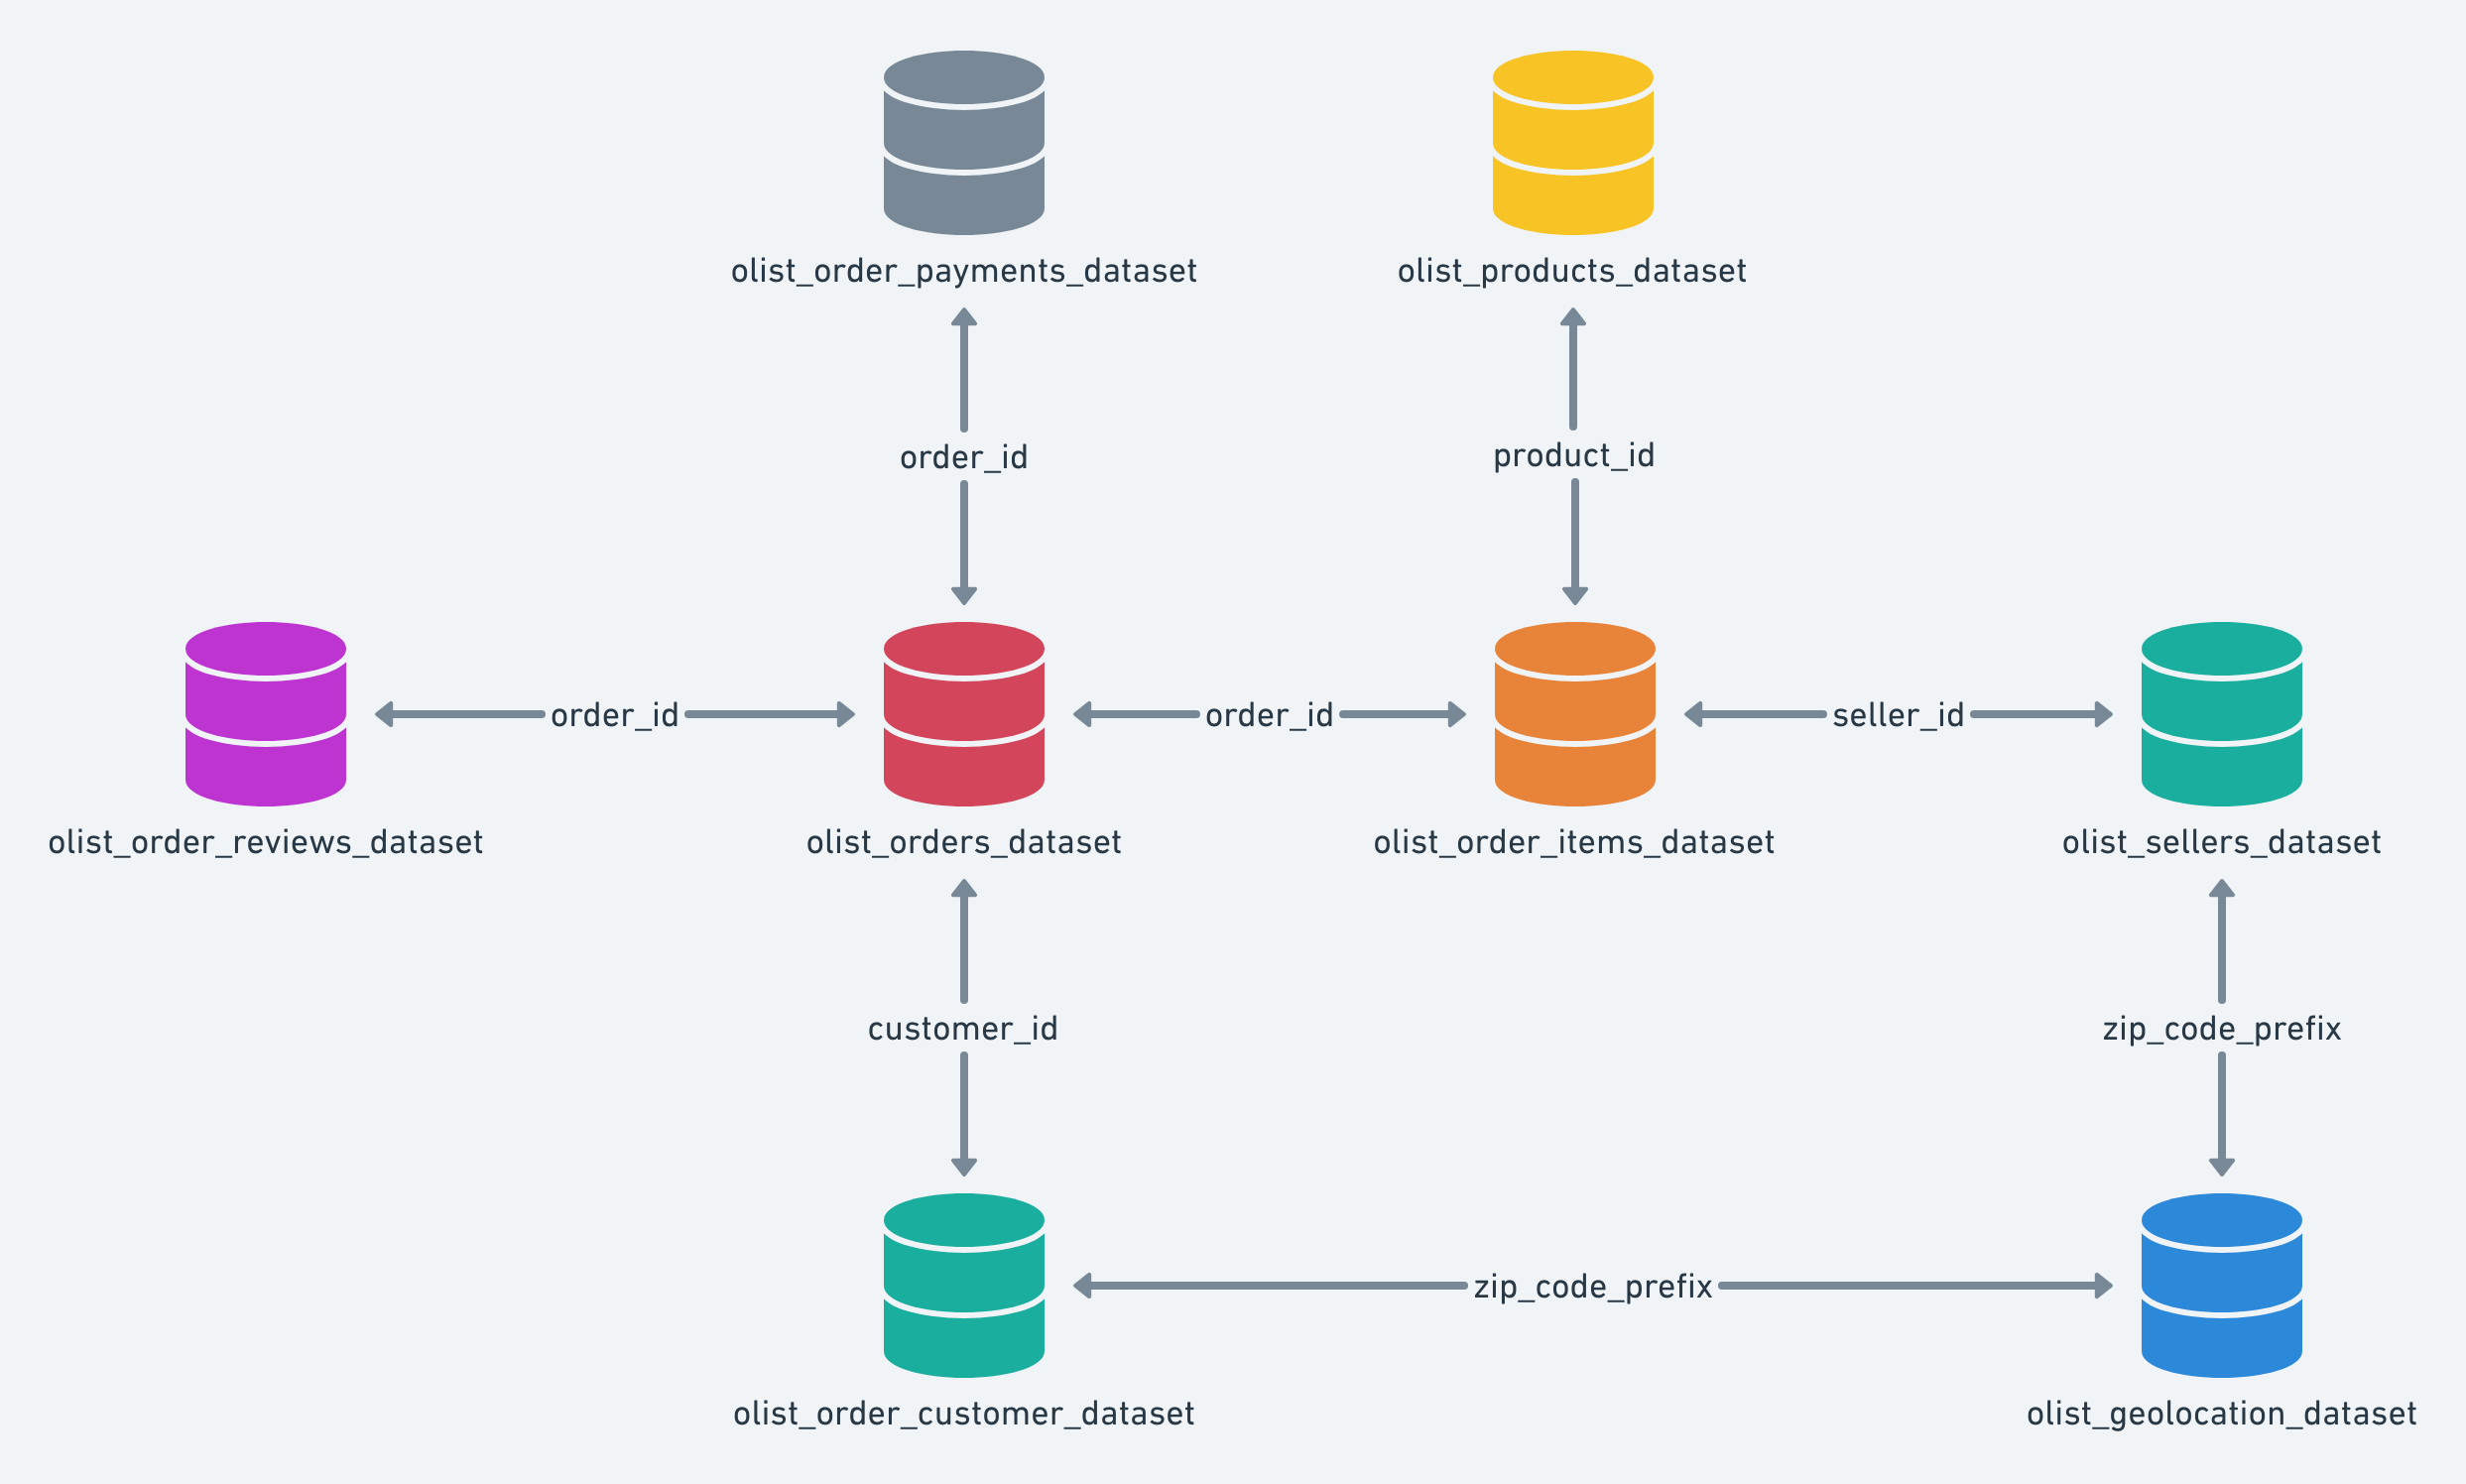

In [2]:
from IPython.display import Image
Image(filename='img/Schema.PNG', width=1000, height=500) 

# SETTING UP ENVIRONMENT

In [151]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import sklearn.model_selection.train_test_split

ModuleNotFoundError: No module named 'sklearn.model_selection.train_test_split'

# DATA CLEANING AND EXPLORATION

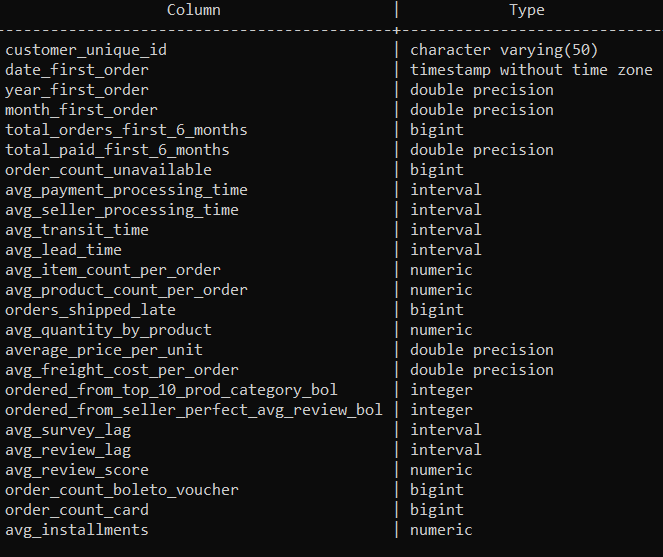

In [4]:
# Dataframe to upload created in PostgreSQL with pertinent variables aggregated
Image(filename='img/sql_df2.PNG', width=600, height=300)

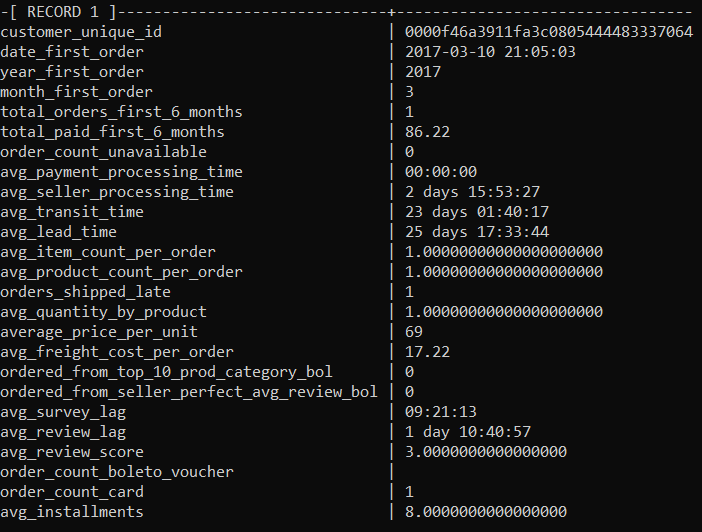

In [5]:
# Below is 1 record from SQL source

Image(filename='img/sql_df.PNG', width=600, height=300) 

In [6]:
# From SQL Query

df = pd.read_csv('main_df.csv',na_values=['NULL'])

In [7]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,average_price_per_unit,avg_freight_cost_per_order,ordered_from_top_10_prod_category_bol,ordered_from_seller_perfect_avg_review_bol,avg_survey_lag,avg_review_lag,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,00:00:00,2 days 15:53:27,23 days 01:40:17,...,69.00,17.22,0,0,09:21:13,1 day 10:40:57,3.0,NaN,1.0,8.0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,00:19:36,23:38:38,19 days 01:14:46,...,25.99,17.63,1,0,02:36:55,1 day 02:54:46,4.0,NaN,1.0,4.0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 day 20:43:59,...,27.99,7.39,1,0,11:51:01,4 days 08:32:52,4.0,1.0,NaN,1.0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,00:17:01,1 day 08:53:49,14 days 22:53:21,...,191.00,37.18,1,0,04:57:09,1 day 04:20:02,1.0,NaN,1.0,3.0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,00:11:14,1 day 05:41:55,3 days 03:19:01,...,135.00,15.12,0,0,15:26:52,6 days 19:12:51,4.0,NaN,1.0,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 25 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null object
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null object
avg_seller_processing_time                    94217 non-null object
avg_transit_time                              93306 non-null object
avg_lead_time                                 93327 non-null object
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order                   94978 non-null float64
orders_s

In [9]:
# update data type of date_first_order to datetime

df['date_first_order'] = pd.to_datetime(df.date_first_order)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 25 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null object
avg_seller_processing_time                    94217 non-null object
avg_transit_time                              93306 non-null object
avg_lead_time                                 93327 non-null object
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order                   94978 non-null float64


In [11]:
# update data type of intervals

df['avg_payment_processing_time'] = pd.to_timedelta(df.avg_payment_processing_time)

In [12]:
df['avg_seller_processing_time'] = pd.to_timedelta(df.avg_seller_processing_time)

In [13]:
df['avg_transit_time'] = pd.to_timedelta(df.avg_transit_time)

In [14]:
df['avg_lead_time'] = pd.to_timedelta(df.avg_lead_time)

In [15]:
df['avg_survey_lag'] = pd.to_timedelta(df.avg_survey_lag)

In [16]:
df['avg_review_lag'] = pd.to_timedelta(df.avg_review_lag)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 25 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null timedelta64[ns]
avg_seller_processing_time                    94217 non-null timedelta64[ns]
avg_transit_time                              93306 non-null timedelta64[ns]
avg_lead_time                                 93327 non-null timedelta64[ns]
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order      

In [18]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,average_price_per_unit,avg_freight_cost_per_order,ordered_from_top_10_prod_category_bol,ordered_from_seller_perfect_avg_review_bol,avg_survey_lag,avg_review_lag,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,69.00,17.22,0,0,09:21:13,1 days 10:40:57,3.0,NaN,1.0,8.0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,25.99,17.63,1,0,02:36:55,1 days 02:54:46,4.0,NaN,1.0,4.0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,27.99,7.39,1,0,11:51:01,4 days 08:32:52,4.0,1.0,NaN,1.0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,191.00,37.18,1,0,04:57:09,1 days 04:20:02,1.0,NaN,1.0,3.0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,135.00,15.12,0,0,15:26:52,6 days 19:12:51,4.0,NaN,1.0,3.0


In [19]:
df.shape

(95557, 25)

In [20]:
# create active boolean column for possible later segmentation

df['Active?'] = np.where(df['total_orders_first_6_months']>1, 1, 0)

In [21]:
# confirm new column was made

df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_freight_cost_per_order,ordered_from_top_10_prod_category_bol,ordered_from_seller_perfect_avg_review_bol,avg_survey_lag,avg_review_lag,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,Active?
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,17.22,0,0,09:21:13,1 days 10:40:57,3.0,NaN,1.0,8.0,0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,17.63,1,0,02:36:55,1 days 02:54:46,4.0,NaN,1.0,4.0,0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,7.39,1,0,11:51:01,4 days 08:32:52,4.0,1.0,NaN,1.0,0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,37.18,1,0,04:57:09,1 days 04:20:02,1.0,NaN,1.0,3.0,0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,15.12,0,0,15:26:52,6 days 19:12:51,4.0,NaN,1.0,3.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 26 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null timedelta64[ns]
avg_seller_processing_time                    94217 non-null timedelta64[ns]
avg_transit_time                              93306 non-null timedelta64[ns]
avg_lead_time                                 93327 non-null timedelta64[ns]
avg_item_count_per_order                      94978 non-null float64
avg_product_count_per_order      

In [23]:
# update nulls in numeric fields

df[['avg_item_count_per_order']] = df[['avg_item_count_per_order']].fillna(value=df[['avg_item_count_per_order']].mean())

In [24]:
df[['avg_product_count_per_order']] = df[['avg_product_count_per_order']].fillna(value=df[['avg_product_count_per_order']].mean())

In [25]:
df[['orders_shipped_late']] = df[['orders_shipped_late']].fillna(value=0)

In [26]:
df[['avg_quantity_by_product']] = df[['avg_quantity_by_product']].fillna(value=df[['avg_quantity_by_product']].mean)

In [27]:
df[['average_price_per_unit']] = df[['average_price_per_unit']].fillna(value=0)

In [28]:
df[['avg_freight_cost_per_order']] = df[['avg_freight_cost_per_order']].fillna(value=df[['average_price_per_unit']].mean())

In [29]:
df[['avg_review_score']] = df[['avg_review_score']].fillna(value=df[['avg_review_score']].mean())

In [30]:
df[['order_count_boleto_voucher']] = df[['order_count_boleto_voucher']].fillna(value=0)

In [31]:
df[['order_count_card']] = df[['order_count_boleto_voucher']].fillna(value=0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 26 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95538 non-null timedelta64[ns]
avg_seller_processing_time                    94217 non-null timedelta64[ns]
avg_transit_time                              93306 non-null timedelta64[ns]
avg_lead_time                                 93327 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [33]:
# nulls in timedelta columns to be all replaced by average

df[['avg_payment_processing_time']] = df[['avg_payment_processing_time']].fillna(value=df[['avg_payment_processing_time']].mean())

In [34]:
df[['avg_seller_processing_time']] = df[['avg_seller_processing_time']].fillna(value=df[['avg_seller_processing_time']].mean())

In [35]:
df[['avg_transit_time']] = df[['avg_transit_time']].fillna(value=df[['avg_transit_time']].mean())

In [36]:
df[['avg_lead_time']] = df[['avg_lead_time']].fillna(value=df[['avg_lead_time']].mean())

In [37]:
df[['avg_survey_lag']] = df[['avg_survey_lag']].fillna(value=df[['avg_survey_lag']].mean())

In [38]:
df[['avg_review_lag']] = df[['avg_review_lag']].fillna(value=df[['avg_review_lag']].mean())

In [76]:
df[['avg_freight_cost_per_order']] = df[['avg_freight_cost_per_order']].fillna(value=df[['avg_freight_cost_per_order']].mean())

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 31 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [78]:
# count of orders to be used in new variables as proportion of total orders for model

df['perc_orders_unavailable'] = df['order_count_unavailable'] /df['total_orders_first_6_months']

In [41]:
df['perc_orders_shipped_late'] = df['orders_shipped_late'] /df['total_orders_first_6_months']

In [115]:
df['perc_orders_boleto_voucher'] = df['order_count_boleto_voucher'] /df['total_orders_first_6_months']

In [116]:
df['perc_orders_credit_debit'] = df['order_count_card'] /df['total_orders_first_6_months']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 31 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

# EXPLORATORY DATA ANALYSIS

In [80]:
df.describe()

,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,avg_lead_time,avg_item_count_per_order,...,avg_review_lag,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto/voucher,perc_orders_credit/debit
count,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557,95557,95557,95557,95557.000000,...,95557,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000,95557.000000
mean,2017.538862,6.032023,1.027722,165.114350,0.006321,0 days 10:24:55.742172,3 days 05:43:04.200089,9 days 08:18:29.293808,12 days 13:37:49.120114,1.138711,...,3 days 14:01:02.243725,4.083129,0.264062,0.264062,2.967344,0.025398,0.006143,0.897097,0.256209,0.256209
std,0.504728,3.233668,0.183784,227.022859,0.079910,1 days 01:52:53.176134,3 days 12:36:33.538067,8 days 15:55:47.743931,9 days 10:30:00.330823,0.524213,...,9 days 18:42:14.802269,1.343197,0.587733,0.587733,2.722363,0.157333,0.077791,0.302128,0.556636,0.556636
min,2016.000000,1.000000,1.000000,9.590000,0.000000,0 days 00:00:00,0 days 00:00:32,0 days 00:00:00,0 days 12:48:07,1.000000,...,0 days 00:01:20,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.000000,1.000000,62.980000,0.000000,0 days 00:12:57,1 days 03:31:34,4 days 04:04:34,6 days 20:47:12,1.000000,...,1 days 08:21:07,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2018.000000,6.000000,1.000000,107.650000,0.000000,0 days 00:20:47,2 days 06:01:17,7 days 04:22:20,10 days 10:22:38,1.000000,...,2 days 06:01:45,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2018.000000,8.000000,1.000000,181.780000,0.000000,0 days 14:39:41,4 days 01:01:28,11 days 22:18:00,15 days 10:17:21,1.000000,...,3 days 14:01:02.243725,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,12.000000,9.000000,13664.080000,2.000000,187 days 21:10:50,125 days 18:36:45,205 days 04:35:00,209 days 15:05:12,21.000000,...,518 days 23:29:52,5.000000,33.000000,33.000000,29.000000,1.000000,1.000000,1.000000,29.000000,29.000000


### Baseline Numbers

In [45]:
# customer count

len(df.customer_unique_id.unique())

95557

In [46]:
# average revenue per customer in the first 6 months

df["total_paid_first_6_months"].mean()

165.1143502830771

In [47]:
# average order_count per customer in the first 6 months

df["total_orders_first_6_months"].mean()

1.0277216739746957

In [48]:
# What is the median?
df.total_orders_first_6_months.median()

1.0

### New Customer Date Patterns - Month & Year

In [49]:
# First valuable to look at is the month the customer became active

new_customers_by_month = df.groupby('month_first_order').count().customer_unique_id
new_customers_by_month

month_first_order
1      7754
2      8118
3      9549
4      9034
5     10171
6      9049
7      9901
8     10376
9      4113
10     4743
11     7270
12     5479
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

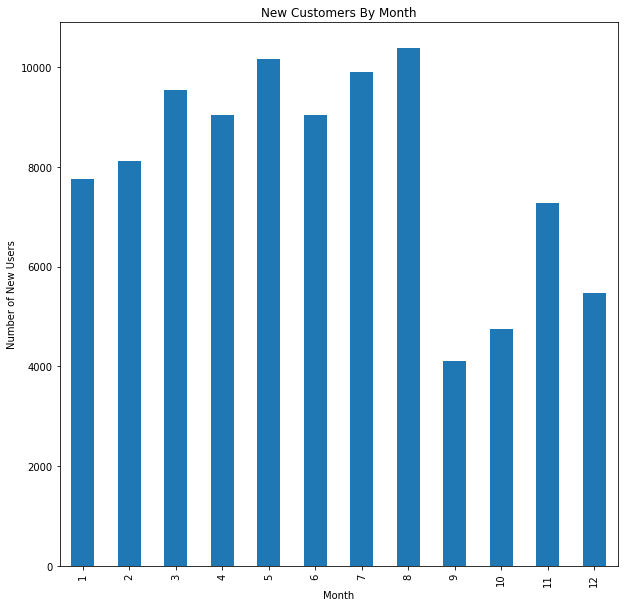

In [50]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_month.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of New Users')

In [51]:
# What date range do we have here for first order (the day the customer converted for the first tim)e?

df.date_first_order.min()

Timestamp('2016-09-04 21:15:19')

In [52]:
# Last conversion in data set

df.date_first_order.max()

Timestamp('2018-08-29 15:00:37')

In [53]:
# To have a better sense, perhaps we should add the year


new_customers_by_month_year = df.groupby(['year_first_order','month_first_order']).count().customer_unique_id
new_customers_by_month_year

year_first_order  month_first_order
2016              9                       1
                  10                    297
                  12                      1
2017              1                     762
                  2                    1735
                  3                    2603
                  4                    2334
                  5                    3571
                  6                    3126
                  7                    3868
                  8                    4162
                  9                    4112
                  10                   4446
                  11                   7270
                  12                   5478
2018              1                    6992
                  2                    6383
                  3                    6946
                  4                    6700
                  5                    6600
                  6                    5923
                  7                    6

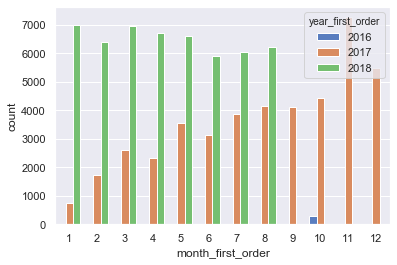

In [54]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month_first_order", hue = "year_first_order", data=df, palette = "muted")

#### Oh Oh! In 2017, new users per month continued to go up but it seems to be stalling in 2018. 

In [55]:
# is average number of new customers increasing per year

new_customers_by_year = df.groupby('year_first_order').count().customer_unique_id
new_customers_by_year

year_first_order
2016      299
2017    43467
2018    51791
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

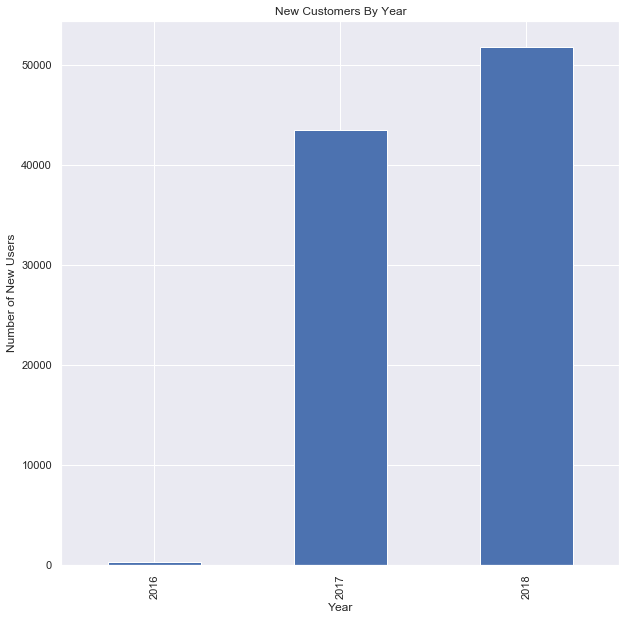

In [56]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_year.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of New Users')

#### Good news! Even though we don't have all the data for the last 4 months of 2018. The total number of new users for January - August 29 is already higher than all of 207

In [57]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_review_lag,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto/voucher,perc_orders_credit/debit
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,1 days 10:40:57,3.0,0.0,0.0,8.0,0,0.0,1.0,0.0,0.0
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,1 days 02:54:46,4.0,0.0,0.0,4.0,0,0.0,1.0,0.0,0.0
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,4 days 08:32:52,4.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,1 days 04:20:02,1.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,6 days 19:12:51,4.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0


In [58]:
# average 6-month revenue split by year 

df["total_paid_first_6_months"].mean()

df.groupby('year_first_order').mean().total_paid_first_6_months

year_first_order
2016    180.906254
2017    165.938862
2018    164.331186
Name: total_paid_first_6_months, dtype: float64

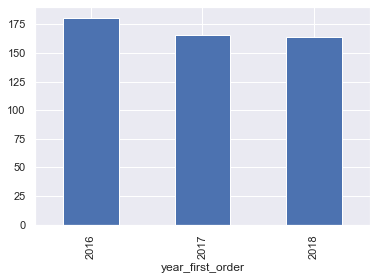

In [59]:
df.groupby('year_first_order').mean().total_paid_first_6_months.plot.bar()

#### Oh Oh! Average first 6 months decreasing YOY

In [60]:
# average 6-month revenue split by month

df["total_paid_first_6_months"].mean()

df.groupby('month_first_order').mean().total_paid_first_6_months

month_first_order
1     160.121118
2     157.383221
3     167.333929
4     172.468507
5     169.986005
6     166.479152
7     163.113787
8     158.598298
9     176.765349
10    173.505880
11    163.445842
12    158.502473
Name: total_paid_first_6_months, dtype: float64

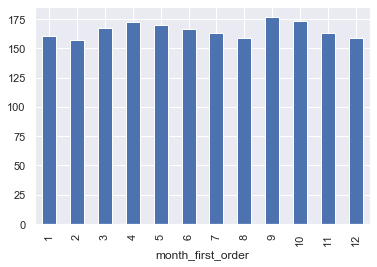

In [83]:
df.groupby('month_first_order').mean().total_paid_first_6_months.plot.bar()

#### Avg 6mo revenue fluctuates per month. Doesn't seem super significant

In [84]:
# Now, let's look at the day of the week when the customer was acquired

df['day_first_order'] = df['date_first_order'].dt.dayofweek

In [85]:
df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto/voucher,perc_orders_credit/debit,day_first_order
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,3.0,0.0,0.0,8.0,0,0.0,1.0,0.0,0.0,4
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,4.0,0.0,0.0,4.0,0,0.0,1.0,0.0,0.0,3
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,4.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,4
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,1.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0,2
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,4.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0,5


In [86]:
def dayofweek(row):
    if row['day_first_order'] == 0:
        return 'Monday'
    elif row['day_first_order'] == 1:
        return 'Tuesday'
    elif row['day_first_order'] == 2:
        return 'Wednesday'
    elif row['day_first_order'] == 3:
        return 'Thursday'
    elif row['day_first_order'] == 4:
        return 'Friday'
    elif row['day_first_order'] == 5:
        return 'Saturday'
    elif row['day_first_order'] == 6:
        return 'Sunday'

df.loc[:,'day_first_order'] = df.apply(dayofweek, axis=1)

df.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months,order_count_unavailable,avg_payment_processing_time,avg_seller_processing_time,avg_transit_time,...,avg_review_score,order_count_boleto_voucher,order_count_card,avg_installments,Active?,perc_orders_unavailable,perc_orders_shipped_late,perc_orders_boleto/voucher,perc_orders_credit/debit,day_first_order
0,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017,3,1,86.22,0,0 days 00:00:00,2 days 15:53:27,23 days 01:40:17,...,3.0,0.0,0.0,8.0,0,0.0,1.0,0.0,0.0,Friday
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017,10,1,43.62,0,0 days 00:19:36,0 days 23:38:38,19 days 01:14:46,...,4.0,0.0,0.0,4.0,0,0.0,1.0,0.0,0.0,Thursday
2,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018,4,1,35.38,0,4 days 14:53:50,5 days 02:27:37,1 days 20:43:59,...,4.0,1.0,1.0,1.0,0,0.0,1.0,1.0,1.0,Friday
3,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018,2,1,419.18,0,0 days 00:17:01,1 days 08:53:49,14 days 22:53:21,...,1.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0,Wednesday
4,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017,3,1,150.12,0,0 days 00:11:14,1 days 05:41:55,3 days 03:19:01,...,4.0,0.0,0.0,3.0,0,0.0,1.0,0.0,0.0,Saturday


In [87]:
new_customers_by_day_of_the_week = df.groupby('day_first_order').count().customer_unique_id
new_customers_by_day_of_the_week

day_first_order
Friday       13600
Monday       15556
Saturday     10446
Sunday       11492
Thursday     14157
Tuesday      15347
Wednesday    14959
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of New Users')

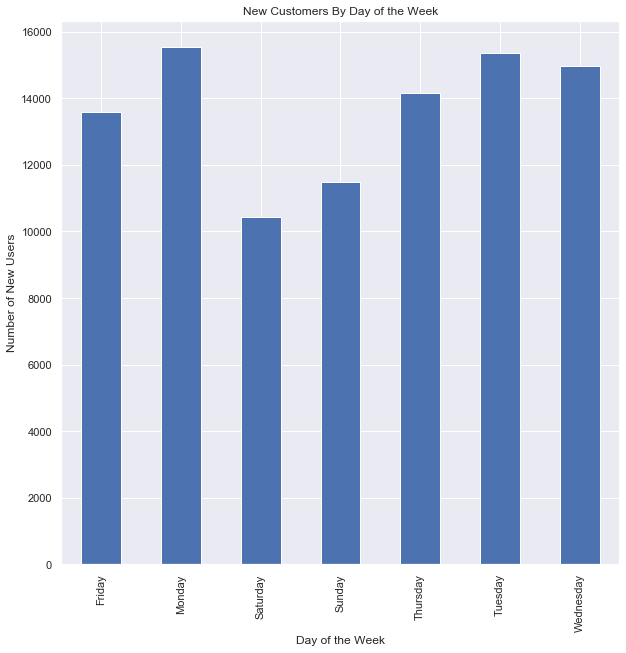

In [88]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
new_customers_by_day_of_the_week.plot(kind = 'bar', ax = ax)
ax.set_title('New Customers By Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of New Users')

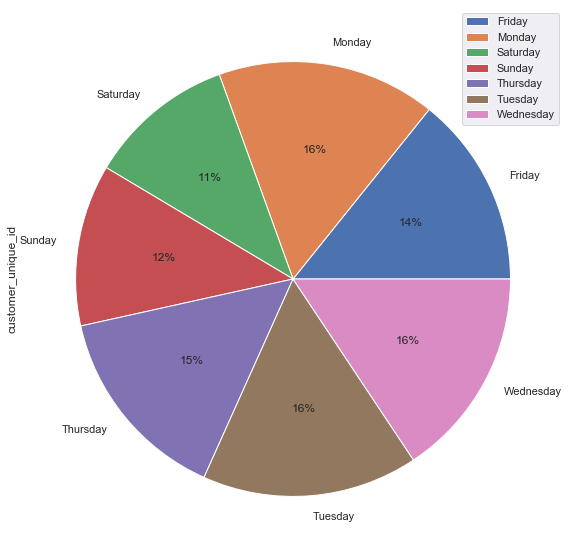

In [67]:
dfs = pd.DataFrame(new_customers_by_day_of_the_week)
plot = dfs.plot.pie(subplots = True, figsize=(10, 10), autopct='%1.0f%%')

#### The difference between the first day of the order place is mild. The only observation is that the bottom 2 days of the weeks with the least amount of new uses were actually Saturday and Sunday. So, there is a higher chance of adding new customers on weekdays instead of weekdays

### New Customer Demographics

In [89]:
# Upload data with state

customer_demo = pd.read_csv('customer_demographics.csv',na_values=['NULL'],encoding='latin-1')

In [90]:
customer_demo.head()

,customer_unique_id,customer_state,customer_zip_code
0,0f6b5c99a18002587ce3016b74990606,MG,38610
1,0527504d9e51e19c4f352774078872f0,CE,60349
2,f970695774455214d343a537cd2472cf,ES,29216
3,fee6e134e5709ca3b2496610ad7c4172,MG,38800
4,93bf7b89c7c76b368a61b9d0b2c721b7,PR,87370


In [93]:
# There are dupes in table. Should be dropped

customer_demo.drop_duplicates(subset ="customer_unique_id", 
                     keep = False, inplace = True) 

In [72]:
customer_demo.shape

(50395, 4)

In [97]:
customers_by_state = customer_demo.groupby("customer_state").count().customer_unique_id
customers_by_state

customer_state
AC       77
AL      398
AM      143
AP       67
BA     3259
CE     1304
DF     2065
ES     1948
GO     1939
MA      719
MG    11180
MS      692
MT      872
PA      945
PB      517
PE     1598
PI      478
PR     4855
RJ    12278
RN      473
RO      236
RR       44
RS     5247
SC     3512
SE      340
SP    39933
TO      272
Name: customer_unique_id, dtype: int64

Text(0, 0.5, 'Number of Users')

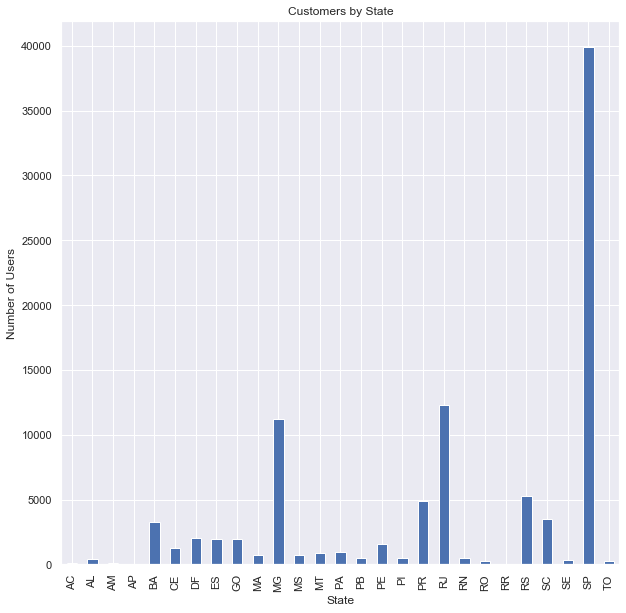

In [98]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()   
customers_by_state.plot(kind = 'bar', ax = ax)
ax.set_title('Customers by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Users')

#### The difference between states is quite drastic. Understandably, Sao Paulo is the biggest one but the second most popular state Rio de Janeiro has about half the population but a much smaller percentage of users. Olist should consider looking at why either the SP region is more likely to use the platform and/or why other regions wouldn't. State Data will be added to the customer dataframe for first 6 months.

# REGRESSION LTV MODEL 

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95557 entries, 0 to 95556
Data columns (total 33 columns):
customer_unique_id                            95557 non-null object
date_first_order                              95557 non-null datetime64[ns]
year_first_order                              95557 non-null int64
month_first_order                             95557 non-null int64
total_orders_first_6_months                   95557 non-null int64
total_paid_first_6_months                     95557 non-null float64
order_count_unavailable                       95557 non-null int64
avg_payment_processing_time                   95557 non-null timedelta64[ns]
avg_seller_processing_time                    95557 non-null timedelta64[ns]
avg_transit_time                              95557 non-null timedelta64[ns]
avg_lead_time                                 95557 non-null timedelta64[ns]
avg_item_count_per_order                      95557 non-null float64
avg_product_count_per_order      

In [212]:
# first linear regression model
#linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()
# NO: timedelta  

formula = 'total_paid_first_6_months ~ perc_orders_unavailable + avg_review_score + C(month_first_order) + avg_item_count_per_order + avg_product_count_per_order + average_price_per_unit + avg_freight_cost_per_order + C(ordered_from_top_10_prod_category_bol) + C(ordered_from_seller_perfect_avg_review_bol) + avg_installments + perc_orders_shipped_late + perc_orders_boleto_voucher + perc_orders_credit_debit'
fitted_model = smf.ols(formula=formula, data=data).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.877
Model:                                   OLS   Adj. R-squared:                  0.877
Method:                        Least Squares   F-statistic:                 3.089e+04
Date:                       Sat, 07 Dec 2019   Prob (F-statistic):               0.00
Time:                               23:57:32   Log-Likelihood:            -5.5397e+05
No. Observations:                      95557   AIC:                         1.108e+06
Df Residuals:                          95534   BIC:                         1.108e+06
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            -89.2818      1.945    -45.903      0.000     -93.094     -85.470
C(month_first_order)[T.2]                             -0.0388      1.267     -0.031      0.976      -2.522       2.444
C(month_first_order)[T.3]                              0.1672      1.220      0.137      0.891      -2.225       2.559
C(month_first_order)[T.4]                             -0.4776      1.235     -0.387      0.699      -2.899       1.944
C(month_first_order)[T.5]                              1.0265      1.203      0.853      0.394      -1.332       3.385
C(month_first_order)[T.6]                             -2.0731      1.236     -1.677      0.094      -4.496       0.350
C(month_first_order)[T.7]                             -0.4061      1.211     -0.335      0.737      -2.780       1.967
C(month_first_order)[T.8]                             -1.5415      1.198     -1.286      0.198      -3.890       0.807
C(month_first_order)[T.9]                              5.8527      1.539      3.803      0.000       2.836       8.869
C(month_first_order)[T.10]                            -1.8868      1.470     -1.283      0.199      -4.768       0.995
C(month_first_order)[T.11]                             0.2644      1.302      0.203      0.839      -2.288       2.817
C(month_first_order)[T.12]                            -0.1119      1.407     -0.080      0.937      -2.870       2.646
C(ordered_from_top_10_prod_category_bol)[T.1]          2.2730      0.540      4.213      0.000       1.216       3.330
C(ordered_from_seller_perfect_avg_review_bol)[T.1]    -1.2899      2.627     -0.491      0.623      -6.440       3.860
perc_orders_unavailable                              177.5627      3.456     51.376      0.000     170.789     184.337
avg_review_score                                      -0.2671      0.200     -1.337      0.181      -0.659       0.124
avg_item_count_per_order                             104.7951      0.560    187.250      0.000     103.698     105.892
avg_product_count_per_order                          -24.0295      1.368    -17.566      0.000     -26.711     -21.348
average_price_per_unit                                 1.0420      0.002    673.569      0.000       1.039       1.045
avg_freight_cost_per_order                             1.2655      0.017     73.331      0.000       1.232       1.299
avg_installments                                       0.7602      0.103      7.348      0.000       0.557       0.963
perc_orders_shipped_late                              -1.3082      0.891     -1.468      0.142      -3.054       0.438
perc_orders_boleto_voucher     